# Introduction of business problem

Due to Coronavirus pandemic, a lot of restaurants have to shut down their business. And some of them only offer take-out and delivery services. The government is planning to reopen the business in NYC. If someone wants to open a Japanese restaurant in midtown Manhattan, and provides both take-out and delivery service to the office building nearby, where should him/her open this restaurant? 

To think of this question, this location should satisfy several conditions. First, this location must have a cluster of office buildings, and lack of Japanese restaurant. Second, this location has other restaurants who also provide take-out and delivery service, in this case, we can make take-out and delivery become possible.


# Data section

Data source:
1. NYU Geojson data https://geo.nyu.edu/catalog/nyu_2451_34572 including geolocation coordinates about the neighborhood in midtown Manhattan 
2. Foursquare location data: including restaurants information, such as type of restaurant, whether provide take-out or delivery service. Also provide information about office building location. 

In [3]:
import json
with open('/Users/linzhixin/Downloads/nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [16]:
newyork_data['features'][0]['geometry']['coordinates']

[-73.84720052054902, 40.89470517661]

In [13]:
import pandas as pd
import numpy as np
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [17]:
for items in newyork_data['features']:
    borough=items['properties']['borough']
    neighborhood=items['properties']['name']
    latitude=items['geometry']['coordinates'][1]
    longtitude=items['geometry']['coordinates'][0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood,
                                          'Latitude': latitude,
                                          'Longitude': longtitude}, ignore_index=True)

In [137]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [20]:
manhattan_data=neighborhoods[neighborhoods.Borough=='Manhattan']
manhattan_data=manhattan_data.reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [140]:
lower_la=40.735
upper_la=40.761559
midtown=manhattan_data[manhattan_data.Latitude>lower_la]

In [141]:
midtown=midtown[midtown.Latitude<upper_la]

In [142]:
midtown.reset_index(inplace=True,drop=True)

In [143]:
midtown

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Clinton,40.759101,-73.996119
1,Manhattan,Midtown,40.754691,-73.981669
2,Manhattan,Murray Hill,40.748303,-73.978332
3,Manhattan,Chelsea,40.744035,-74.003116
4,Manhattan,Gramercy,40.737210,-73.981376
5,Manhattan,Midtown South,40.748510,-73.988713
6,Manhattan,Sutton Place,40.760280,-73.963556
7,Manhattan,Turtle Bay,40.752042,-73.967708
8,Manhattan,Tudor City,40.746917,-73.971219
9,Manhattan,Flatiron,40.739673,-73.990947


In [39]:
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

import folium 


In [144]:
latitude=40.7549
longitude=-73.9840

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(midtown['Latitude'], midtown['Longitude'], midtown['Borough'], midtown['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [45]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [69]:
radius=500
LIMIT=10
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
result=requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5ebc9762963d29001bb683fc'},
 'response': {'venues': [{'id': '58cc9644739d8523a63d716a',
    'name': 'Allegro Coffee Company',
    'location': {'address': '1095 Avenue Of The Americas',
     'crossStreet': '41st',
     'lat': 40.75453645610046,
     'lng': -73.98430530273227,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75453645610046,
       'lng': -73.98430530273227}],
     'distance': 47,
     'postalCode': '10036',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1095 Avenue Of The Americas (41st)',
      'New York, NY 10036',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-158

In [94]:
"delivery" in result['response']['venues'][0]

False

In [162]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        for v in results:
            if 'delivery' in v:
                delivery=1
                venues_list.append([name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name'], delivery])
            else:
                delivery=0
                venues_list.append([name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name'],delivery])

    nearby_venues=pd.DataFrame(venues_list)
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category','Delivery']
    
    return(nearby_venues)

In [163]:
midtown_venues = getNearbyVenues(names=midtown['Neighborhood'],
                                   latitudes=midtown['Latitude'],
                                   longitudes=midtown['Longitude'])
midtown_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Delivery
0,Clinton,40.759101,-73.996119,Rustic Table,40.759754,-73.996013,Café,1
1,Clinton,40.759101,-73.996119,Claudio Pizzeria Ristorante,40.760368,-73.994991,Pizza Place,1
2,Clinton,40.759101,-73.996119,Little Pie Company,40.759507,-73.993199,Pie Shop,0
3,Clinton,40.759101,-73.996119,Dunkin',40.756114,-73.997611,Donut Shop,1
4,Clinton,40.759101,-73.996119,"Auntie Anne's Pretzels, Cinnabon & Carvel",40.757347,-73.989436,Snack Place,0
...,...,...,...,...,...,...,...,...
544,Hudson Yards,40.756658,-74.000111,Sunac Natural Food,40.760725,-73.998425,Health Food Store,0
545,Hudson Yards,40.756658,-74.000111,H-Yard Gourmet Deli,40.754067,-73.995729,Deli / Bodega,1
546,Hudson Yards,40.756658,-74.000111,Taqueria Diana,40.756616,-73.993937,Taco Place,1
547,Hudson Yards,40.756658,-74.000111,Treadwell,40.759964,-73.996284,Restaurant,1


In [156]:
midtown_restaurant_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, name, neighborhood in zip(midtown_venues['Venue Latitude'], midtown_venues['Venue Longitude'], midtown_venues['Venue'], midtown_venues['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(midtown_restaurant_map)  
    
midtown_restaurant_map

In [131]:

url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d124941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
result=requests.get(url).json()
result['response']['venues'][0]['categories'][0]   

{'id': '4bf58dd8d48988d124941735',
 'name': 'Office',
 'pluralName': 'Offices',
 'shortName': 'Office',
 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
  'suffix': '.png'},
 'primary': True}

In [157]:
def getNearbyOffice(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d124941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        for v in results:
            venues_list.append([name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name']])

    nearby_venues=pd.DataFrame(venues_list)
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    
    return(nearby_venues)

In [158]:
midtown_office = getNearbyOffice(names=midtown['Neighborhood'],
                                   latitudes=midtown['Latitude'],
                                   longitudes=midtown['Longitude'])
midtown_office

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clinton,40.759101,-73.996119,DHL,40.757358,-73.997465,Office
1,Clinton,40.759101,-73.996119,Staybridge Suites Times Square - New York City,40.756616,-73.992670,Hotel
2,Clinton,40.759101,-73.996119,CUneXus Solutions,40.760660,-73.996914,Tech Startup
3,Clinton,40.759101,-73.996119,Datadog HQ,40.757299,-73.989336,Tech Startup
4,Clinton,40.759101,-73.996119,Workshop/APD,40.754794,-73.991844,Office
...,...,...,...,...,...,...,...
521,Hudson Yards,40.756658,-74.000111,R/GA Party Central (near Systems),40.756035,-73.993554,Coworking Space
522,Hudson Yards,40.756658,-74.000111,Umami Co,40.754487,-73.994336,Office
523,Hudson Yards,40.756658,-74.000111,Nomad Office Nyc,40.760933,-73.998687,Office
524,Hudson Yards,40.756658,-74.000111,Butler Rogers Baskett Architects,40.752780,-73.995150,Office


In [159]:

for lat, lng, name, neighborhood in zip(midtown_office['Venue Latitude'], midtown_office['Venue Longitude'], midtown_office['Venue'], midtown_office['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(midtown_restaurant_map)  

midtown_restaurant_map

In [164]:
midtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Delivery
Neighborhood,,,,,,,
Chelsea,49,49,49,49,49,49,49
Clinton,50,50,50,50,50,50,50
Flatiron,50,50,50,50,50,50,50
Gramercy,50,50,50,50,50,50,50
Hudson Yards,50,50,50,50,50,50,50
Midtown,50,50,50,50,50,50,50
Midtown South,50,50,50,50,50,50,50
Murray Hill,50,50,50,50,50,50,50
Sutton Place,50,50,50,50,50,50,50


In [172]:
midtown_cat=pd.get_dummies(midtown_venues[['Venue Category']])
midtown_cat['Neighborhood']=midtown_venues['Neighborhood']
midtown_cat.groupby('Neighborhood').mean()

,Venue Category_American Restaurant,Venue Category_Arepa Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Beer Bar,Venue Category_Beer Garden,...,Venue Category_Sushi Restaurant,Venue Category_Taco Place,Venue Category_Tapas Restaurant,Venue Category_Thai Restaurant,Venue Category_Theme Restaurant,Venue Category_Turkish Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Chelsea,0.061224,0.00,0.00,0.00,0.00,0.040816,0.020408,0.00,0.00,0.00,...,0.061224,0.020408,0.020408,0.00,0.00,0.00,0.00,0.00,0.020408,0.00
Clinton,0.040000,0.00,0.00,0.00,0.00,0.020000,0.040000,0.02,0.00,0.00,...,0.000000,0.040000,0.000000,0.02,0.00,0.00,0.00,0.00,0.000000,0.00
Flatiron,0.060000,0.00,0.00,0.00,0.02,0.020000,0.040000,0.00,0.00,0.00,...,0.000000,0.020000,0.000000,0.02,0.00,0.02,0.02,0.02,0.000000,0.00
Gramercy,0.020000,0.02,0.00,0.00,0.00,0.060000,0.040000,0.00,0.00,0.00,...,0.020000,0.060000,0.000000,0.04,0.00,0.00,0.00,0.00,0.000000,0.00
Hudson Yards,0.080000,0.00,0.00,0.00,0.00,0.040000,0.020000,0.00,0.00,0.00,...,0.020000,0.020000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
Midtown,0.000000,0.00,0.00,0.00,0.00,0.000000,0.020000,0.00,0.00,0.00,...,0.040000,0.040000,0.000000,0.00,0.02,0.00,0.02,0.02,0.000000,0.00
Midtown South,0.000000,0.00,0.02,0.00,0.02,0.000000,0.000000,0.02,0.00,0.00,...,0.020000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
Murray Hill,0.020000,0.00,0.00,0.02,0.00,0.020000,0.000000,0.02,0.00,0.00,...,0.000000,0.000000,0.020000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
Sutton Place,0.000000,0.00,0.00,0.00,0.00,0.060000,0.000000,0.00,0.02,0.02,...,0.040000,0.000000,0.020000,0.02,0.00,0.00,0.00,0.00,0.000000,0.00


In [174]:
midtown_cat.columns

Index(['Venue Category_American Restaurant', 'Venue Category_Arepa Restaurant',
       'Venue Category_Asian Restaurant',
       'Venue Category_Australian Restaurant', 'Venue Category_BBQ Joint',
       'Venue Category_Bagel Shop', 'Venue Category_Bakery',
       'Venue Category_Bar', 'Venue Category_Beer Bar',
       'Venue Category_Beer Garden', 'Venue Category_Breakfast Spot',
       'Venue Category_Bubble Tea Shop', 'Venue Category_Burger Joint',
       'Venue Category_Burrito Place', 'Venue Category_Cafeteria',
       'Venue Category_Café', 'Venue Category_Chinese Restaurant',
       'Venue Category_Cocktail Bar', 'Venue Category_Coffee Shop',
       'Venue Category_Convenience Store', 'Venue Category_Cuban Restaurant',
       'Venue Category_Cupcake Shop', 'Venue Category_Deli / Bodega',
       'Venue Category_Dessert Shop', 'Venue Category_Diner',
       'Venue Category_Donut Shop', 'Venue Category_Fast Food Restaurant',
       'Venue Category_Filipino Restaurant', 'Venue Categ

In [292]:
jp=midtown_cat[['Neighborhood','Venue Category_Japanese Restaurant','Venue Category_Ramen Restaurant','Venue Category_Sushi Restaurant','Venue Category_Udon Restaurant']]
jp['Japanese Restaurant']=jp.sum(axis=1)
midtown_venues['Japanese Restaurant']=jp['Japanese Restaurant']
midtown_venues

/Users/linzhixin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Delivery,Japanese Restaurant
0,Clinton,40.759101,-73.996119,Rustic Table,40.759754,-73.996013,Café,1,0
1,Clinton,40.759101,-73.996119,Claudio Pizzeria Ristorante,40.760368,-73.994991,Pizza Place,1,0
2,Clinton,40.759101,-73.996119,Little Pie Company,40.759507,-73.993199,Pie Shop,0,0
3,Clinton,40.759101,-73.996119,Dunkin',40.756114,-73.997611,Donut Shop,1,0
4,Clinton,40.759101,-73.996119,"Auntie Anne's Pretzels, Cinnabon & Carvel",40.757347,-73.989436,Snack Place,0,0
...,...,...,...,...,...,...,...,...,...
544,Hudson Yards,40.756658,-74.000111,Sunac Natural Food,40.760725,-73.998425,Health Food Store,0,0
545,Hudson Yards,40.756658,-74.000111,H-Yard Gourmet Deli,40.754067,-73.995729,Deli / Bodega,1,0
546,Hudson Yards,40.756658,-74.000111,Taqueria Diana,40.756616,-73.993937,Taco Place,1,0
547,Hudson Yards,40.756658,-74.000111,Treadwell,40.759964,-73.996284,Restaurant,1,0


In [281]:
JP_rest_info=midtown_venues[(midtown_venues['Venue Category']=='Japanese Restaurant')|(midtown_venues['Venue Category']=='Ramen Restaurant')
              |(midtown_venues['Venue Category']=='Sushi Restaurant')|(midtown_venues['Venue Category']=='Udon Restaurant')]
JP_rest_info.reset_index(drop=True,inplace=True)
JP_rest_info

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Delivery
0,Clinton,40.759101,-73.996119,Gyu-Kaku Japanese BBQ,40.759042,-73.990043,Japanese Restaurant,0
1,Midtown,40.754691,-73.981669,Sushi Lab,40.758476,-73.983210,Sushi Restaurant,1
2,Midtown,40.754691,-73.981669,Wasabi Sushi & Bento,40.754764,-73.987700,Sushi Restaurant,0
3,Midtown,40.754691,-73.981669,Kajitsu,40.749763,-73.977688,Japanese Restaurant,0
4,Midtown,40.754691,-73.981669,TsuruTonTan,40.758433,-73.980787,Udon Restaurant,1
5,Chelsea,40.744035,-74.003116,Asuka Sushi,40.745418,-73.999073,Sushi Restaurant,0
6,Chelsea,40.744035,-74.003116,Momoya,40.742687,-73.996617,Sushi Restaurant,0
7,Chelsea,40.744035,-74.003116,Ushiwakamaru,40.746399,-74.000958,Sushi Restaurant,0
8,Gramercy,40.737210,-73.981376,Hane Sushi,40.734902,-73.979847,Sushi Restaurant,1
9,Gramercy,40.737210,-73.981376,Oishi Bay Japanese Cuisine,40.741975,-73.978889,Japanese Restaurant,1


In [186]:
jp_rest=jp.groupby('Neighborhood').sum()

In [187]:
jp_rest["sum"] = jp_rest. sum(axis=1)
jp_rest

,Venue Category_Japanese Restaurant,Venue Category_Ramen Restaurant,Venue Category_Sushi Restaurant,Venue Category_Udon Restaurant,sum
Neighborhood,,,,,
Chelsea,0,0,3,0,6
Clinton,1,0,0,0,2
Flatiron,2,0,0,1,6
Gramercy,1,0,1,0,4
Hudson Yards,0,1,1,0,4
Midtown,1,0,2,1,8
Midtown South,2,0,1,0,6
Murray Hill,0,0,0,0,0
Sutton Place,0,0,2,0,4


In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 11 artists>

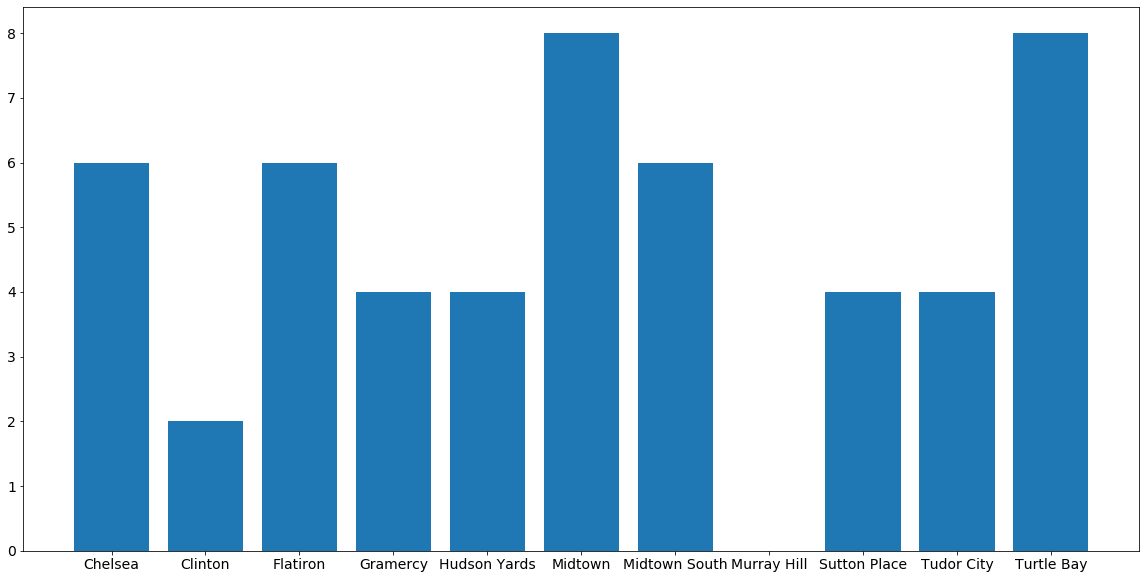

In [214]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.bar(jp_rest.index,jp_rest['sum'])


In [215]:
midtown_office.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Chelsea,47,47,47,47,47,47
Clinton,47,47,47,47,47,47
Flatiron,50,50,50,50,50,50
Gramercy,45,45,45,45,45,45
Hudson Yards,49,49,49,49,49,49
Midtown,50,50,50,50,50,50
Midtown South,50,50,50,50,50,50
Murray Hill,50,50,50,50,50,50
Sutton Place,45,45,45,45,45,45


In [236]:
delivery_summary=midtown_venues.groupby('Neighborhood').sum()[['Delivery']]

<BarContainer object of 11 artists>

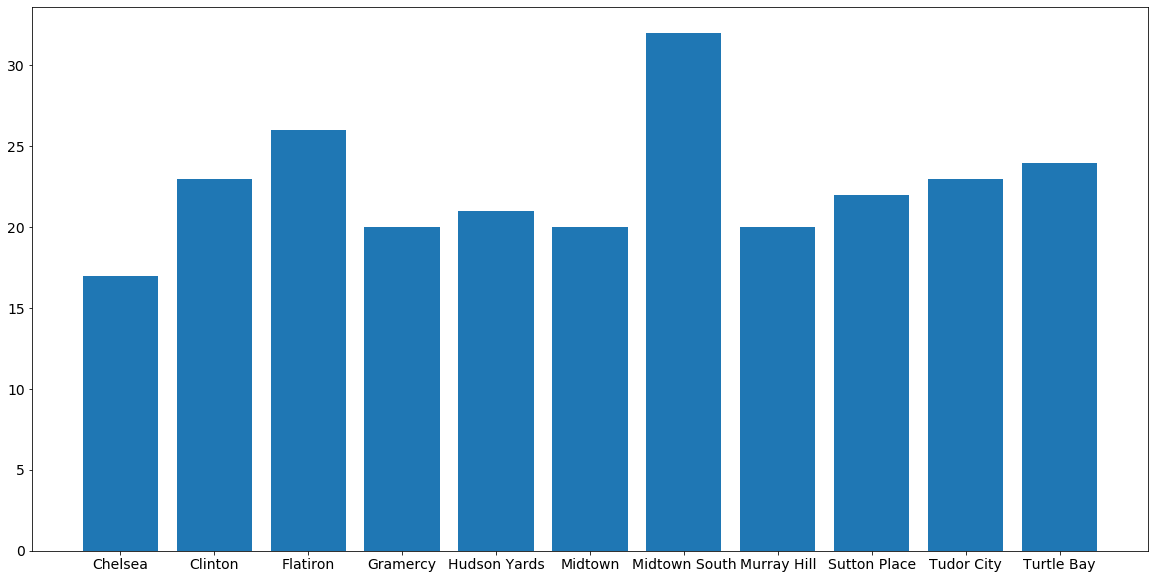

In [237]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.bar(delivery_summary.index,delivery_summary['Delivery'])

In [238]:
delivery_summary

,Delivery
Neighborhood,
Chelsea,17
Clinton,23
Flatiron,26
Gramercy,20
Hudson Yards,21
Midtown,20
Midtown South,32
Murray Hill,20
Sutton Place,22


In [239]:
midtown_summary=delivery_summary
midtown_summary['Japanese Restaurant']=jp_rest['sum']
midtown_summary['Total']=midtown_venues.groupby('Neighborhood').count()[['Delivery']]
midtown_summary

,Delivery,Japanese Restaurant,Total
Neighborhood,,,
Chelsea,17,6,49
Clinton,23,2,50
Flatiron,26,6,50
Gramercy,20,4,50
Hudson Yards,21,4,50
Midtown,20,8,50
Midtown South,32,6,50
Murray Hill,20,0,50
Sutton Place,22,4,50


In [241]:
midtown_summary['Delivery Ratio']=midtown_summary['Delivery']/midtown_summary['Total']
midtown_summary['Japanese Ratio']=midtown_summary['Japanese Restaurant']/midtown_summary['Total']

In [242]:
midtown_summary

,Delivery,Japanese Restaurant,Total,Delivery Ratio,Japanese Ratio
Neighborhood,,,,,
Chelsea,17,6,49,0.346939,0.122449
Clinton,23,2,50,0.460000,0.040000
Flatiron,26,6,50,0.520000,0.120000
Gramercy,20,4,50,0.400000,0.080000
Hudson Yards,21,4,50,0.420000,0.080000
Midtown,20,8,50,0.400000,0.160000
Midtown South,32,6,50,0.640000,0.120000
Murray Hill,20,0,50,0.400000,0.000000
Sutton Place,22,4,50,0.440000,0.080000


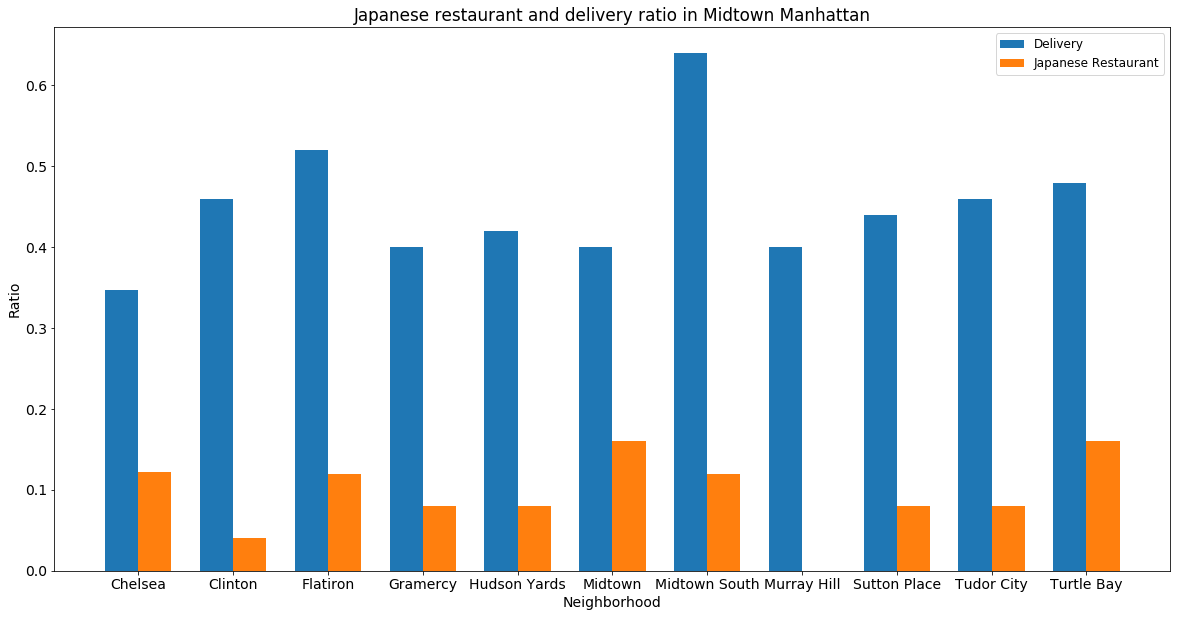

In [256]:
x = np.arange(len(midtown_summary.index)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, midtown_summary['Delivery Ratio'], width, label='Delivery')
rects2 = ax.bar(x + width/2, midtown_summary['Japanese Ratio'], width, label='Japanese Restaurant')


ax.set_ylabel('Ratio')
ax.set_xlabel('Neighborhood')
ax.set_title('Japanese restaurant and delivery ratio in Midtown Manhattan')
ax.set_xticks(x)
ax.set_xticklabels(midtown_summary.index)
plt.rcParams.update({'font.size': 12})
ax.legend()

In [260]:
np.unique(midtown_office['Venue Category'].to_list())

array(['Advertising Agency', 'Building', 'Business Service', 'Café',
       'Club House', 'College Lab', 'Conference Room',
       'Corporate Amenity', 'Corporate Cafeteria', 'Coworking Space',
       'Design Studio', "Doctor's Office", 'Embassy / Consulate',
       'Event Space', 'Hotel', 'Medical Center', 'Office',
       'Residential Building (Apartment / Condo)', 'TV Station',
       'Tech Startup', 'Trade School'], dtype='<U40')

In [275]:
business_office=midtown_office[(midtown_office['Venue Category']=='Building')|(midtown_office['Venue Category']=='Business Service')
              |(midtown_office['Venue Category']=='Conference Room')|(midtown_office['Venue Category']=='Coworking Space')
              |(midtown_office['Venue Category']=='Office')|(midtown_office['Venue Category']=='Tech Starup')
              |(midtown_office['Venue Category']=='Advertising Agency')|(midtown_office['Venue Category']=='Design Studio')
              |(midtown_office['Venue Category']=="Doctor's Office")|(midtown_office['Venue Category']=='Embassy / Consulate')]
business_office

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clinton,40.759101,-73.996119,DHL,40.757358,-73.997465,Office
4,Clinton,40.759101,-73.996119,Workshop/APD,40.754794,-73.991844,Office
5,Clinton,40.759101,-73.996119,Microsoft,40.756764,-73.989858,Office
7,Clinton,40.759101,-73.996119,People's Forum,40.754444,-73.993630,Coworking Space
8,Clinton,40.759101,-73.996119,Bentley Meeker Lighting & Staging,40.755759,-73.998358,Office
...,...,...,...,...,...,...,...
521,Hudson Yards,40.756658,-74.000111,R/GA Party Central (near Systems),40.756035,-73.993554,Coworking Space
522,Hudson Yards,40.756658,-74.000111,Umami Co,40.754487,-73.994336,Office
523,Hudson Yards,40.756658,-74.000111,Nomad Office Nyc,40.760933,-73.998687,Office
524,Hudson Yards,40.756658,-74.000111,Butler Rogers Baskett Architects,40.752780,-73.995150,Office


In [272]:
business_office.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Chelsea,30,30,30,30,30,30
Clinton,37,37,37,37,37,37
Flatiron,34,34,34,34,34,34
Gramercy,34,34,34,34,34,34
Hudson Yards,40,40,40,40,40,40
Midtown,44,44,44,44,44,44
Midtown South,40,40,40,40,40,40
Murray Hill,46,46,46,46,46,46
Sutton Place,43,43,43,43,43,43


In [273]:
midtown_office_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, name, neighborhood in zip(business_office['Venue Latitude'], business_office['Venue Longitude'], business_office['Venue'], business_office['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(midtown_office_map)  
    
midtown_office_map

In [274]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [304]:
def JPRestaurant(names, latitudes, longitudes, radius=50,LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d111941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        if results != 0:
            venues_list.append(len(results))
        else:
            venues_list.append(0)
        
        # return only relevant information for each nearby venue
    
    return(venues_list)

In [305]:
office_nearby=JPRestaurant(names=business_office['Neighborhood'],
                                   latitudes=business_office['Venue Latitude'],
                                   longitudes=business_office['Venue Longitude'])

In [308]:
business_office.insert(0, 'Number of Japanese Restaurant', office_nearby)

In [329]:
business_office

,Number of Japanese Restaurant,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Clinton,40.759101,-73.996119,DHL,40.757358,-73.997465,Office
4,3,Clinton,40.759101,-73.996119,Workshop/APD,40.754794,-73.991844,Office
5,0,Clinton,40.759101,-73.996119,Microsoft,40.756764,-73.989858,Office
7,0,Clinton,40.759101,-73.996119,People's Forum,40.754444,-73.993630,Coworking Space
8,0,Clinton,40.759101,-73.996119,Bentley Meeker Lighting & Staging,40.755759,-73.998358,Office
...,...,...,...,...,...,...,...,...
521,0,Hudson Yards,40.756658,-74.000111,R/GA Party Central (near Systems),40.756035,-73.993554,Coworking Space
522,0,Hudson Yards,40.756658,-74.000111,Umami Co,40.754487,-73.994336,Office
523,0,Hudson Yards,40.756658,-74.000111,Nomad Office Nyc,40.760933,-73.998687,Office
524,0,Hudson Yards,40.756658,-74.000111,Butler Rogers Baskett Architects,40.752780,-73.995150,Office


In [310]:
business_office.groupby('Neighborhood').sum()

,Number of Japanese Restaurant,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
Neighborhood,,,,,
Chelsea,35,1222.321041,-2220.093490,1222.283141,-2220.122276
Clinton,21,1508.086733,-2737.856416,1508.032526,-2737.756201
Flatiron,9,1385.148884,-2515.692202,1385.142149,-2515.672840
Gramercy,28,1385.065134,-2515.366782,1385.108118,-2515.476346
Hudson Yards,3,1630.266323,-2960.004454,1630.183719,-2959.900035
Midtown,20,1793.206409,-3255.193428,1793.221461,-3255.207412
Midtown South,22,1629.940387,-2959.548525,1629.964187,-2959.543249
Murray Hill,35,1874.421942,-3403.003276,1874.516837,-3402.970146
Sutton Place,48,1752.692054,-3180.432914,1752.717426,-3180.577167


In [311]:
summary=business_office.groupby('Neighborhood').sum()[['Number of Japanese Restaurant']]

In [314]:
midtown.set_index('Neighborhood',inplace=True)

In [320]:
summary['Delivery Ratio']=midtown_summary['Delivery Ratio']
summary['Longitude']=midtown['Longitude']
summary['Latitude']=midtown['Latitude']
summary['Number of Office']=business_office.groupby('Neighborhood').count()[['Venue']]
summary

,Number of Japanese Restaurant,Delivery Ratio,Longitude,Latitude,Number of Office
Neighborhood,,,,,
Chelsea,35,0.346939,-74.003116,40.744035,30
Clinton,21,0.460000,-73.996119,40.759101,37
Flatiron,9,0.520000,-73.990947,40.739673,34
Gramercy,28,0.400000,-73.981376,40.737210,34
Hudson Yards,3,0.420000,-74.000111,40.756658,40
Midtown,20,0.400000,-73.981669,40.754691,44
Midtown South,22,0.640000,-73.988713,40.748510,40
Murray Hill,35,0.400000,-73.978332,40.748303,46
Sutton Place,48,0.440000,-73.963556,40.760280,43


In [323]:
summary['Restaurant to Office Ratio']=summary['Number of Japanese Restaurant']/summary['Number of Office']

In [324]:
summary

,Number of Japanese Restaurant,Delivery Ratio,Longitude,Latitude,Number of Office,Restaurant to Office Ratio
Neighborhood,,,,,,
Chelsea,35,0.346939,-74.003116,40.744035,30,1.166667
Clinton,21,0.460000,-73.996119,40.759101,37,0.567568
Flatiron,9,0.520000,-73.990947,40.739673,34,0.264706
Gramercy,28,0.400000,-73.981376,40.737210,34,0.823529
Hudson Yards,3,0.420000,-74.000111,40.756658,40,0.075000
Midtown,20,0.400000,-73.981669,40.754691,44,0.454545
Midtown South,22,0.640000,-73.988713,40.748510,40,0.550000
Murray Hill,35,0.400000,-73.978332,40.748303,46,0.760870
Sutton Place,48,0.440000,-73.963556,40.760280,43,1.116279


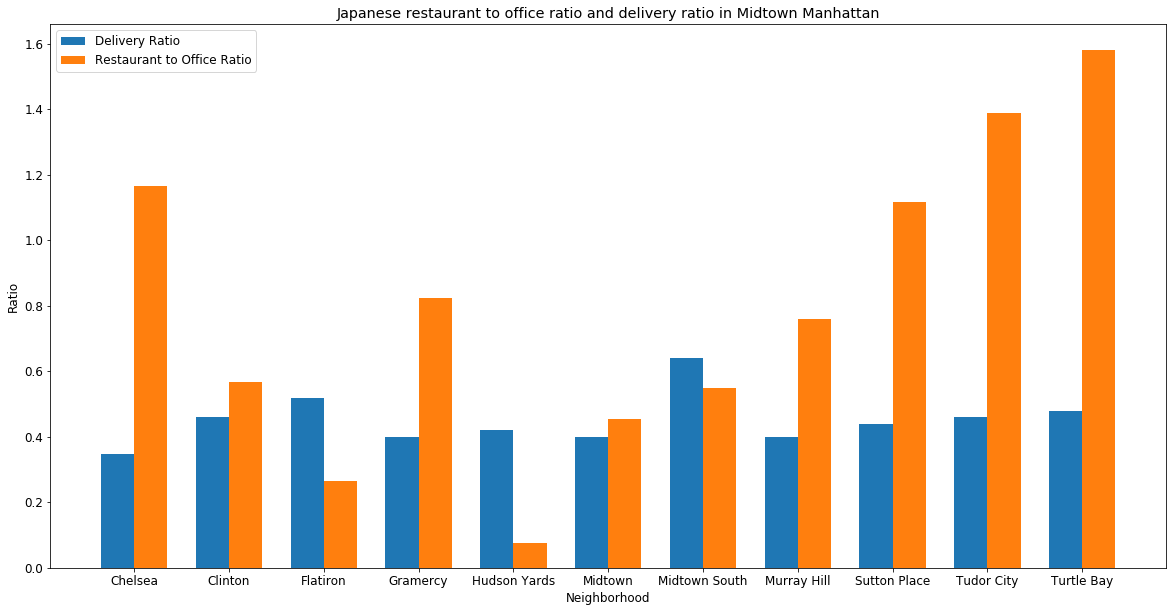

In [325]:
x = np.arange(len(summary.index)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2,summary['Delivery Ratio'], width, label='Delivery Ratio')
rects2 = ax.bar(x + width/2, summary['Restaurant to Office Ratio'], width, label='Restaurant to Office Ratio')


ax.set_ylabel('Ratio')
ax.set_xlabel('Neighborhood')
ax.set_title('Japanese restaurant to office ratio and delivery ratio in Midtown Manhattan')
ax.set_xticks(x)
ax.set_xticklabels(summary.index)
plt.rcParams.update({'font.size': 12})
ax.legend()

In [328]:
np.average(summary['Delivery Ratio'])

0.45153988868274586

In [330]:
np.average(summary['Restaurant to Office Ratio'])

0.7955275335598547

In [335]:
summary[(summary['Restaurant to Office Ratio']<0.7955) & (summary['Delivery Ratio']>0.452)]

,Number of Japanese Restaurant,Delivery Ratio,Longitude,Latitude,Number of Office,Restaurant to Office Ratio
Neighborhood,,,,,,
Clinton,21,0.46,-73.996119,40.759101,37,0.567568
Flatiron,9,0.52,-73.990947,40.739673,34,0.264706
Midtown South,22,0.64,-73.988713,40.748510,40,0.550000


In [336]:
summary[(summary['Delivery Ratio']>0.452)]

,Number of Japanese Restaurant,Delivery Ratio,Longitude,Latitude,Number of Office,Restaurant to Office Ratio
Neighborhood,,,,,,
Clinton,21,0.46,-73.996119,40.759101,37,0.567568
Flatiron,9,0.52,-73.990947,40.739673,34,0.264706
Midtown South,22,0.64,-73.988713,40.748510,40,0.550000
Tudor City,57,0.46,-73.971219,40.746917,41,1.390244
Turtle Bay,68,0.48,-73.967708,40.752042,43,1.581395
